In [163]:
# IMPORT PACKAGES FOR PROJECT

from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
# Define Function to calculate the number of days in a year
def days_in_year(year):
    if year % 4 == 0:
        if year % 100 == 0:
            if year % 400 == 0:
                return 366
            else:
                return 365
        else:
            return 366
    else:
        return 365

In [165]:
book_list2021 = {1:{'Name':"The richest man in Babylon", 'Author':"George S. Clason", 'Pages':224, 'Format': "Print"}
                 , 2:{'Name':"The slight edge: Turning simple disciplines into massive success & happiness", 'Author':"Jeff Olson", 'Pages':280, 'Format': "Print"}
                 , 3:{'Name':"Intermittent fasting basics: Your guide to the essentials of intermittent fasting - and how it can work for you!", 'Author':"Lindsay Boyers", 'Pages':219, 'Format': "Print"}
                 , 4:{'Name':"The one thing: The surprisingly simple truth behind extraordinary results", 'Author':"Gary Keller", 'Pages':240, 'Format': "Print"}
                 , 5:{'Name':"Who moved my cheese: An A-Mazing way to deal with change in your work and in your life", 'Author':"Spencer Johnson", 'Pages':94, 'Format': "Print"}
                 , 6:{'Name':"Think and grow rich", 'Author':"Napoleon Hill", 'Pages':290, 'Format': "Ebook"}
                 , 7:{'Name':"Outwitting the devil: The secret to freedom and success", 'Author':"Napoleon Hill", 'Pages':302, 'Format': "Ebook"}
                 , 8:{'Name':"The four agreements: a practical guide to personal freedom", 'Author':"Don Miquel Ruiz", 'Pages':140, 'Format': "Print"}
                 , 9:{'Name':"Atomic habits: an easy and proven way to build good habits and break bad ones", 'Author':"James Clear", 'Pages':298, 'Format': "Print"}
                 , 10:{'Name':"How to win friends and influence people", 'Author':"Dale Carnegie", 'Pages':250, 'Format': "Print"}
                 , 11:{'Name':"Trading in the zone: master the market with confidence, discipline and a winning attitude", 'Author':"Mark Douglas", 'Pages':207, 'Format': "Print"}
                 , 12:{'Name':"Stone soup", 'Author':"Marcia Brown", 'Pages':52, 'Format': "Print"}
                 , 13:{'Name':"Rich dad's cashflow quadrant: Guide to financial freedom", 'Author':"Robert T. Kiyosaki", 'Pages':282, 'Format': "Ebook"}
                 , 14:{'Name':"A beginners guide to the stock market", 'Author':"Mathew R. Kratter", 'Pages':100, 'Format': "Ebook"}
                 , 15:{'Name':"Credit spread options for beginners: turn your most boring stocks into reliable monthly paychecks using call, put & iron butterfly spreads - even if the market is doing nothing", 'Author':"Freeman Publications", 'Pages':134, 'Format': "Ebook"}
                 , 16:{'Name':"Heart sick: Connecting the dots between hope, disappointment and healing", 'Author':"Conscious Core", 'Pages':107, 'Format': "Ebook"}
                 , 17:{'Name':"Thinking strategically: the competitive edge in business, politics and everyday life", 'Author':"Avinash K. Dixit & " "Barry J. Nalebuff", 'Pages':384, 'Format': "Ebook"}
                 , 18:{'Name':"Noise trading and illusory corrections in the US equity markets", 'Author':"Jennifer C. Bender & " "Carol L. Osler & " "David Simon", 'Pages':47, 'Format': "Research Paper"}
                }

In [166]:
BL21 = pd.DataFrame(book_list2021).transpose()
BL21

,Name,Author,Pages,Format
1,The richest man in Babylon,George S. Clason,224,Print
2,The slight edge: Turning simple disciplines in...,Jeff Olson,280,Print
3,Intermittent fasting basics: Your guide to the...,Lindsay Boyers,219,Print
4,The one thing: The surprisingly simple truth b...,Gary Keller,240,Print
5,Who moved my cheese: An A-Mazing way to deal w...,Spencer Johnson,94,Print
6,Think and grow rich,Napoleon Hill,290,Ebook
7,Outwitting the devil: The secret to freedom an...,Napoleon Hill,302,Ebook
8,The four agreements: a practical guide to pers...,Don Miquel Ruiz,140,Print
9,Atomic habits: an easy and proven way to build...,James Clear,298,Print
10,How to win friends and influence people,Dale Carnegie,250,Print


In [167]:
pages_read21 = BL21['Pages'].sum()
print(f"Number of books read in 2021: \t\t\t\t {BL21['Name'].count()} books read in 2021")
print(f"Number of pages read in 2021: \t\t\t\t {format(pages_read21, ',d')} total pages read")
print(f"Average number of pages read per month in 2021: \t {round(pages_read21/12)} pages read per month")
print(f"Average number of pages read per day in 2021: \t\t {round(pages_read21/days_in_year(2021))} pages read per day")

Number of books read in 2021: 				 18 books read in 2021
Number of pages read in 2021: 				 3,650 total pages read
Average number of pages read per month in 2021: 	 304 pages read per month
Average number of pages read per day in 2021: 		 10 pages read per day


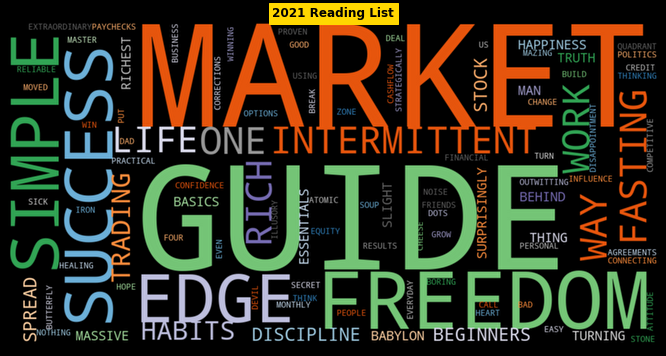

In [168]:
word_string=""

for book in BL21['Name']:
     word_string += book.upper() + " "

word_cloud = WordCloud(
     background_color='black'
                       , scale=3, collocations=True
                       , colormap='tab20c'
                       , normalize_plurals=True
                       ).generate(word_string)

plt.figure(figsize = (20,6), facecolor = 'black')
plt.imshow(word_cloud, interpolation = 'bessel')
plt.axis('off')
plt.title("2021 Reading List", fontweight='bold', color='black', backgroundcolor='gold')

plt.show()

In [169]:
book_list2022 = {1:{'Name':"The subtle art of not giving a F*ck: A counterintuitive approach to living a good life", 'Author':"Mark Manson", 'Pages':206, 'Format': "Ebook"}
                 , 2:{'Name':"Why we sleep; unlocking the power of sleep and dreams", 'Author':"Mathew Walker", 'Pages':323, 'Format': "Ebook"}
                 , 3:{'Name':"Ingredients: the strange chemistry of what we put in and on us", 'Author':"Goerge Zaidan", 'Pages':299, 'Format': "Print"}
                 , 4:{'Name':"We should all be millionaires: A woman's guide to earning more, building wealth, and gaining economic power", 'Author':"Rachel Rodgers", 'Pages':276, 'Format': "Ebook"}
                 , 5:{'Name':"The five love languages: The secret to love that lasts", 'Author':"Gary Chapman", 'Pages':272, 'Format': "Audiobook"}
                 , 6:{'Name':"The art of saying NO: How to stand your ground, reclain your time and energy, and refuse to be taken for granted (Without feeling guilty)", 'Author':"Damon Zahariades", 'Pages':160, 'Format': "Ebook"}
                 , 7:{'Name':"If you had controlling parents: How to make peace with your past and take your place in the world", 'Author':"Dan Neuharth", 'Pages':274, 'Format': "Ebook"}
                 , 8:{'Name':"Abundance beyond trauma: Discovering the courage for change and commitment to yourself", 'Author':"Jeannine L. Rashidi", 'Pages':169, 'Format': "Ebook"}
                 , 9:{'Name':"Dear Girl, A celebration of wonderful, smart and beautiful you!", 'Author':"Amy Krouse Rosenthal & " "Paris Rosenthal", 'Pages':40, 'Format': "Print"}
                }

In [170]:
BL22 = pd.DataFrame(book_list2022).transpose()
BL22

,Name,Author,Pages,Format
1,The subtle art of not giving a F*ck: A counter...,Mark Manson,206,Ebook
2,Why we sleep; unlocking the power of sleep and...,Mathew Walker,323,Ebook
3,Ingredients: the strange chemistry of what we ...,Goerge Zaidan,299,Print
4,We should all be millionaires: A woman's guide...,Rachel Rodgers,276,Ebook
5,The five love languages: The secret to love th...,Gary Chapman,272,Audiobook
6,The art of saying NO: How to stand your ground...,Damon Zahariades,160,Ebook
7,If you had controlling parents: How to make pe...,Dan Neuharth,274,Ebook
8,Abundance beyond trauma: Discovering the coura...,Jeannine L. Rashidi,169,Ebook
9,"Dear Girl, A celebration of wonderful, smart a...",Amy Krouse Rosenthal & Paris Rosenthal,40,Print


In [171]:
pages_read22 = BL22['Pages'].sum()
print(f"Number of books read in 2022: \t\t\t\t {BL22['Name'].count()} books read in 2022")
print(f"Number of pages read in 2022: \t\t\t\t {format(pages_read22, ',d')} total pages read")
print(f"Average number of pages read per month in 2022: \t {round(pages_read22/12)} pages read per month")
print(f"Average number of pages read per day in 2022: \t\t {round(pages_read22/days_in_year(2022))} pages read per day")

Number of books read in 2022: 				 9 books read in 2022
Number of pages read in 2022: 				 2,019 total pages read
Average number of pages read per month in 2022: 	 168 pages read per month
Average number of pages read per day in 2022: 		 6 pages read per day


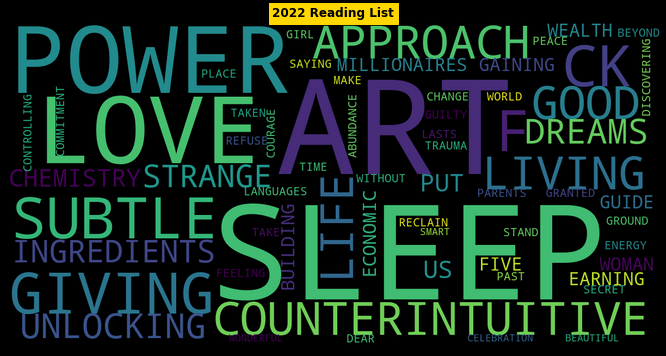

In [172]:
word_string=""

for book in BL22['Name']:
     word_string += book.upper() + " "

word_cloud = WordCloud(background_color='black',scale=3, normalize_plurals = True).generate_from_text(word_string)

plt.figure(figsize = (20,6), facecolor='black')
plt.imshow(word_cloud, interpolation = 'spline36')
plt.axis('off')
plt.title("2022 Reading List", fontweight='bold', color='black', backgroundcolor='gold')

plt.show()

In [173]:
book_list2023 = {"Name":
    ["The 7 habits of highly effective people: Powerful lessons in personal change"
     ,"Why your weirdness is wonderful: Embrace your quirks and live your strengths"
     ,"Be Quiet! (Mother Bruce Book 3)"
     ,"Red Riding Hood"
     ,"Storytelling with data: A visualization guide for business professionals"
     ,"Learning SQL: Generating, Manipulating and Retrieving Data"
     ,"Resonate: Present visual stories that transform audiences"
     ,"Deep Work: Rules for focused success in a distracted world"
     ,"The great gatsby"
     ,"Switch: How to change things when change is hard"
     ,"Rafiki the Chameleon"
     ,"The 4 hour work week: Escape the 9-5, live anywhere and join the new rich"
     ,"The declaration of independence and the constitution of the United States"
     ,"What makes the great great: strategies for extraordinary achievement"]
                 , "Author":
    ["Stephen R. Covey"
    ,"Laurie Wallin"
    ,"Ryan T. Higgins"
    ,"Lydia L. Very"
    ,"Cole Nussbaumer Knaflic"
    ,"Alan Beaulieu"
    ,"Nancy Duarte"
    ,"Cal Newport"
    ,"F. Scott Fitzgerald"
    ,"Chip Heath & Dan Heath"
    ,"Brent Todd"
    ,"Timothy Ferriss"
    ,"U.S. Citizenship and Immigration Services"
    ,"Dennis P. Kimbro"]
                 , "Pages":[556
                            , 193
                            , 22
                            , 53
                            , 255
                            , 610
                            , 336
                            , 287
                            , 233
                            , 322
                            , 46
                            , 324
                            , 56
                            , 328]
                 , "Format": ["Ebook"
                              , "Ebook"
                              , "Ebook"
                              , "Ebook"
                              , "Print"
                              , "Audiobook"
                              , "Ebook"
                              , "Ebook"
                              , "Audiobook"
                              , "Ebook"
                              , "Ebook"
                              , "Audiobook"
                              , "Print"
                              , "Print"]
                 }

In [174]:
BL23 = pd.DataFrame(book_list2023)
BL23.index = BL23.index + 1
BL23

,Name,Author,Pages,Format
1,The 7 habits of highly effective people: Power...,Stephen R. Covey,556,Ebook
2,Why your weirdness is wonderful: Embrace your ...,Laurie Wallin,193,Ebook
3,Be Quiet! (Mother Bruce Book 3),Ryan T. Higgins,22,Ebook
4,Red Riding Hood,Lydia L. Very,53,Ebook
5,Storytelling with data: A visualization guide ...,Cole Nussbaumer Knaflic,255,Print
6,"Learning SQL: Generating, Manipulating and Ret...",Alan Beaulieu,610,Audiobook
7,Resonate: Present visual stories that transfor...,Nancy Duarte,336,Ebook
8,Deep Work: Rules for focused success in a dist...,Cal Newport,287,Ebook
9,The great gatsby,F. Scott Fitzgerald,233,Audiobook
10,Switch: How to change things when change is hard,Chip Heath & Dan Heath,322,Ebook


In [175]:
pages_read23 = BL23['Pages'].sum()
print(f"Number of books read in 2023: \t\t\t\t {BL23['Name'].count()} books read in 2023")
print(f"Number of pages read in 2023: \t\t\t\t {format(pages_read23, ',d')} total pages read")
print(f"Average number of pages read per month in 2023: \t {round(pages_read23/12)} pages read per month")
print(f"Average number of pages read per day in 2023: \t\t {round(pages_read23/days_in_year(2023))} pages read per day")

Number of books read in 2023: 				 14 books read in 2023
Number of pages read in 2023: 				 3,621 total pages read
Average number of pages read per month in 2023: 	 302 pages read per month
Average number of pages read per day in 2023: 		 10 pages read per day


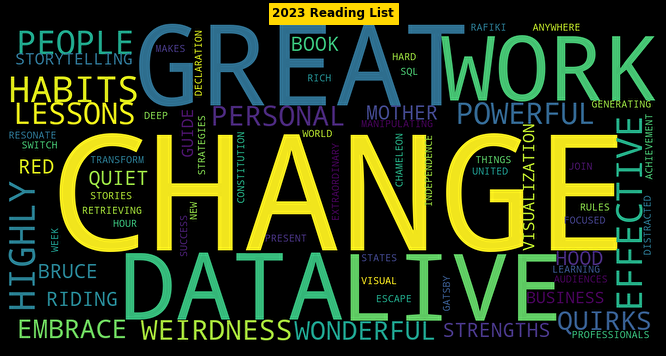

In [176]:
word_string=""

for book in BL23['Name']:
     word_string += book.upper() + " "

word_cloud = WordCloud(background_color='black',scale=3, normalize_plurals = True).generate_from_text(word_string)

plt.figure(figsize = (20,6), facecolor='black')
plt.imshow(word_cloud, interpolation = 'sinc')
# 'antialiased', 'none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'spline36', 'hanning', 'hamming', 
# 'hermite', 'kaiser', 'quadric', 'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos', 'blackman'
plt.axis('off')
plt.title("2023 Reading List", fontweight='bold', color='black', backgroundcolor='gold')

plt.show()

In [177]:
BL21['Year Read'] = '2021'
BL22['Year Read'] = '2022'
BL23['Year Read'] = '2023'

In [178]:
comb_list = pd.concat([BL21, BL22, BL23]).sort_values(by='Name').set_index(
            [pd.Index(range(1, len(BL21) + len(BL22) + len(BL23) + 1))])
comb_list

,Name,Author,Pages,Format,Year Read
1,A beginners guide to the stock market,Mathew R. Kratter,100,Ebook,2021
2,Abundance beyond trauma: Discovering the coura...,Jeannine L. Rashidi,169,Ebook,2022
3,Atomic habits: an easy and proven way to build...,James Clear,298,Print,2021
4,Be Quiet! (Mother Bruce Book 3),Ryan T. Higgins,22,Ebook,2023
5,Credit spread options for beginners: turn your...,Freeman Publications,134,Ebook,2021
6,"Dear Girl, A celebration of wonderful, smart a...",Amy Krouse Rosenthal & Paris Rosenthal,40,Print,2022
7,Deep Work: Rules for focused success in a dist...,Cal Newport,287,Ebook,2023
8,"Heart sick: Connecting the dots between hope, ...",Conscious Core,107,Ebook,2021
9,How to win friends and influence people,Dale Carnegie,250,Print,2021
10,If you had controlling parents: How to make pe...,Dan Neuharth,274,Ebook,2022


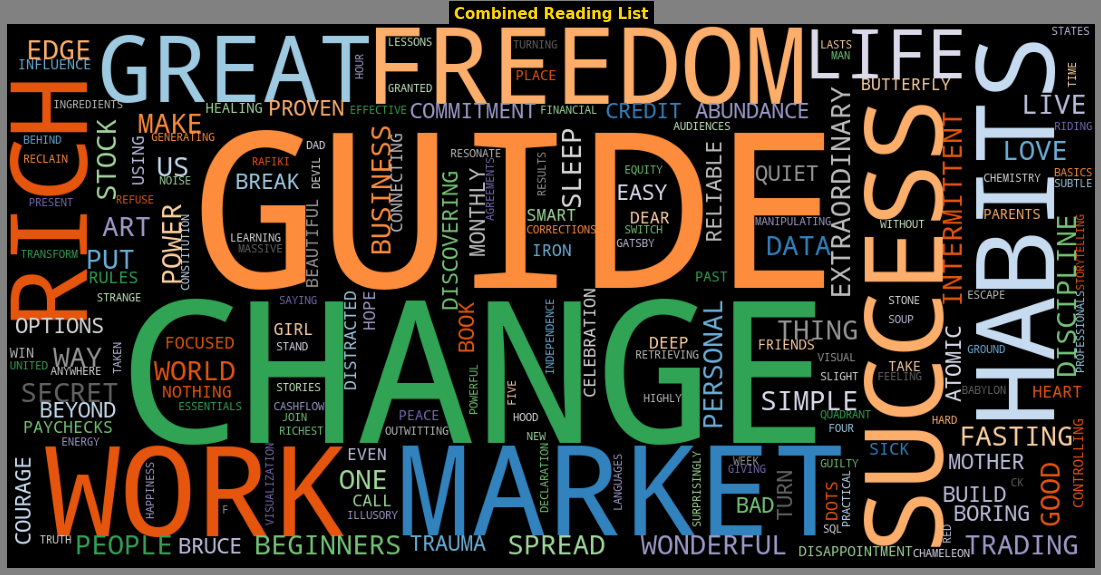

In [179]:
word_string=""

for book in comb_list['Name']:
     word_string += book.upper() + " "

word_cloud = WordCloud(background_color='black',scale=3, collocations=True, colormap='tab20c', normalize_plurals=True).generate_from_text(word_string)

plt.figure(figsize = (20,10), facecolor=(0,0,0,0.49))
plt.imshow(word_cloud)
plt.axis('off')
plt.title("Combined Reading List", fontweight='bold', color='gold', backgroundcolor='black', fontsize=15)

plt.show()

In [180]:
print('Key Words in Book Titles')
comb_list[comb_list['Name'].str.contains(
    'power| abundance| heal| habit| time| invest| change| grow| discipline| courage| work| learn'
    , case=False)]

Key Words in Book Titles


,Name,Author,Pages,Format,Year Read
2,Abundance beyond trauma: Discovering the coura...,Jeannine L. Rashidi,169,Ebook,2022
3,Atomic habits: an easy and proven way to build...,James Clear,298,Print,2021
7,Deep Work: Rules for focused success in a dist...,Cal Newport,287,Ebook,2023
8,"Heart sick: Connecting the dots between hope, ...",Conscious Core,107,Ebook,2021
12,Intermittent fasting basics: Your guide to the...,Lindsay Boyers,219,Print,2021
22,Switch: How to change things when change is hard,Chip Heath & Dan Heath,322,Ebook,2023
23,"The 4 hour work week: Escape the 9-5, live any...",Timothy Ferriss,324,Audiobook,2023
24,The 7 habits of highly effective people: Power...,Stephen R. Covey,556,Ebook,2023
25,The art of saying NO: How to stand your ground...,Damon Zahariades,160,Ebook,2022
32,The slight edge: Turning simple disciplines in...,Jeff Olson,280,Print,2021


In [191]:
# Save file as CSV to create a power BI dashboard
labels = ['Short', 'Medium', 'Long']
bins = [0, 200, 280, 1000]
comb_list['Bin'] = pd.cut(comb_list['Pages'], bins=bins, labels=labels)
comb_list.to_csv('reading_list.csv', index=False)

comb_list.groupby(['Format', 'Bin']).agg({'Name': 'count', 'Pages': 'sum'}).rename(
                    columns={'Name': 'Books Read', 'Pages': 'Pages Read'})

Books Read  Pages Read
Format         Bin                           
Audiobook      Short            0           0
               Medium           2         505
               Long             2         934
Ebook          Short            9         984
               Medium           3         756
               Long             9        3082
Print          Short            5         382
               Medium           7        1675
               Long             3         925
Research Paper Short            1          47
               Medium           0           0
               Long             0           0

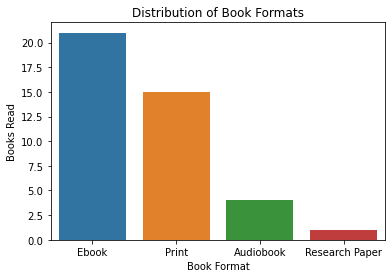

In [182]:
plt.figure()
sns.countplot(data=comb_list, x='Format')
plt.xlabel('Book Format')
plt.ylabel('Books Read')
plt.title('Distribution of Book Formats')
plt.show()

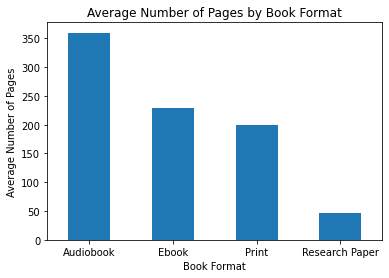

In [183]:
# Calculate the average number of pages for each book format
avg_pages_by_format = comb_list.groupby('Format')['Pages'].mean()

avg_pages_by_format.plot(kind='bar', title='Average Number of Pages by Book Format', rot=0)
plt.ylabel('Average Number of Pages')
plt.xlabel('Book Format')
plt.show()

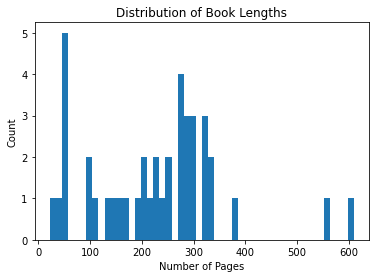

In [184]:
# Plotting a histogram of book lengths (number of pages)
plt.hist(comb_list['Pages'], bins=50)
plt.xlabel('Number of Pages')
plt.ylabel('Count')
plt.title('Distribution of Book Lengths')
plt.show()

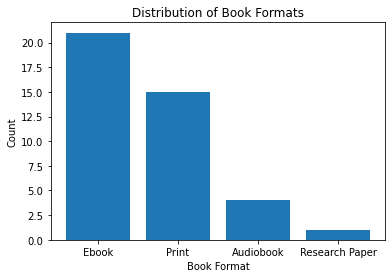

In [185]:
# Count the occurrences of each book format
format_counts = comb_list['Format'].value_counts()

# Plot the distribution of book formats
plt.bar(format_counts.index, format_counts.values)
plt.xlabel('Book Format')
plt.ylabel('Count')
plt.title('Distribution of Book Formats')
plt.show()

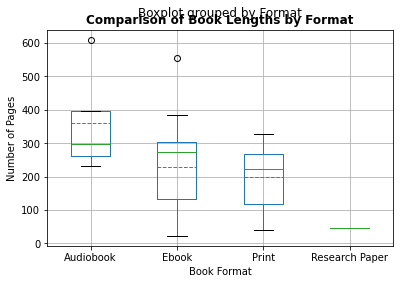

In [186]:
# Creating a box plot to compare book lengths across formats
comb_list.boxplot(column='Pages', by='Format', showfliers=True, showmeans=True, meanline=True)
plt.xlabel('Book Format')
plt.ylabel('Number of Pages')
plt.title('Comparison of Book Lengths by Format', fontweight='bold', loc='center')
plt.show()


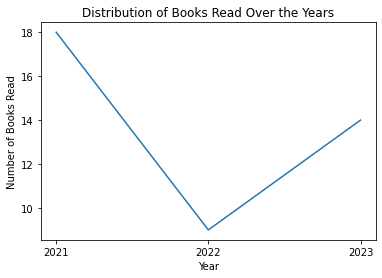

In [187]:
# Count the occurrences of books read by year
books_by_year = comb_list['Year Read'].value_counts().sort_index()

# Plot the distribution of books read over the years
plt.plot(books_by_year.index, books_by_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Books Read')
plt.title('Distribution of Books Read Over the Years')
plt.show()

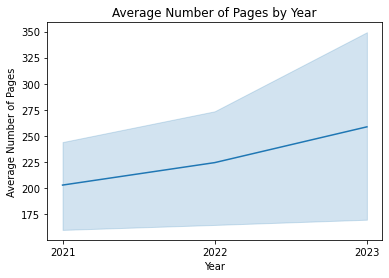

In [188]:
# Plot the average number of pages by year
plt.figure()
sns.lineplot(data=comb_list, x='Year Read', y='Pages')
plt.xlabel('Year')
plt.ylabel('Average Number of Pages')
plt.title('Average Number of Pages by Year')
plt.show()

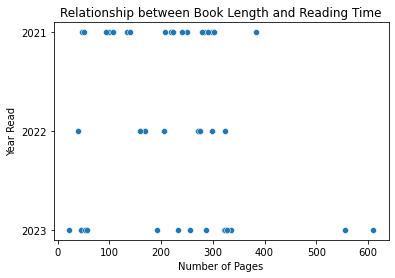

In [189]:
# Creating a scatter plot to visualize the relationship between book length and reading time
sns.scatterplot(x=comb_list['Pages'], y=comb_list['Year Read'])
plt.xlabel('Number of Pages')
plt.ylabel('Year Read')
plt.title('Relationship between Book Length and Reading Time')
plt.show()